In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pathlib
import cv2
import PIL 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
data_directory = pathlib.Path('dataset/')
len(list(data_directory.glob('*/*.jpg')))

918

In [14]:
corgi = list(data_directory.glob('corgi/*'))

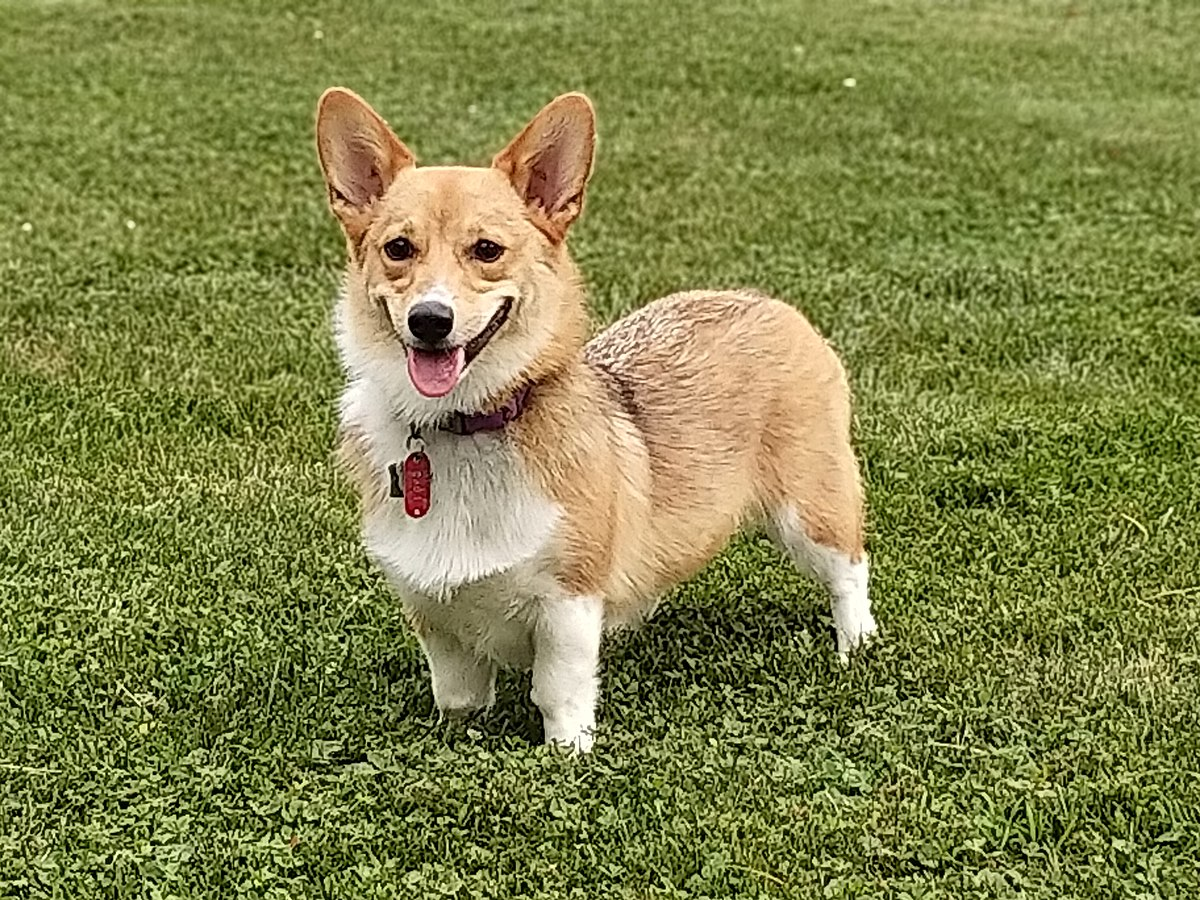

In [15]:
PIL.Image.open(str(corgi[0]))

In [16]:
import os
directory = "D:/college/Python/github/deep-learning/projects/DogBreedsClassification/dataset"

breed_names = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

breed_names

['bernese_mountain_dog',
 'border_collie',
 'chihuahua',
 'corgi',
 'dachshund',
 'golden_retriever',
 'jack_russell',
 'labrador',
 'pug',
 'siberian_husky']

In [24]:
breed_names_dict = {
    folder: list(data_directory.glob(f"{folder}/*"))
    for folder in os.listdir(data_directory)
    if(data_directory / folder).is_dir()
}

breed_names_dict['corgi']

[WindowsPath('dataset/corgi/corgi1.jpg'),
 WindowsPath('dataset/corgi/corgi10.jpg'),
 WindowsPath('dataset/corgi/corgi100.jpg'),
 WindowsPath('dataset/corgi/corgi11.jpg'),
 WindowsPath('dataset/corgi/corgi15.jpg'),
 WindowsPath('dataset/corgi/corgi16.jpg'),
 WindowsPath('dataset/corgi/corgi17.jpg'),
 WindowsPath('dataset/corgi/corgi18.jpg'),
 WindowsPath('dataset/corgi/corgi19.jpg'),
 WindowsPath('dataset/corgi/corgi2.jpg'),
 WindowsPath('dataset/corgi/corgi20.jpg'),
 WindowsPath('dataset/corgi/corgi21.jpg'),
 WindowsPath('dataset/corgi/corgi22.jpg'),
 WindowsPath('dataset/corgi/corgi23.jpg'),
 WindowsPath('dataset/corgi/corgi24.jpg'),
 WindowsPath('dataset/corgi/corgi25.jpg'),
 WindowsPath('dataset/corgi/corgi26.jpg'),
 WindowsPath('dataset/corgi/corgi27.jpg'),
 WindowsPath('dataset/corgi/corgi28.jpg'),
 WindowsPath('dataset/corgi/corgi3.jpg'),
 WindowsPath('dataset/corgi/corgi30.jpg'),
 WindowsPath('dataset/corgi/corgi31.jpg'),
 WindowsPath('dataset/corgi/corgi32.jpg'),
 WindowsPath(

In [25]:
breed_labels_dict = {folder: index for index, folder in enumerate(breed_names)}

In [26]:
breed_labels_dict

{'bernese_mountain_dog': 0,
 'border_collie': 1,
 'chihuahua': 2,
 'corgi': 3,
 'dachshund': 4,
 'golden_retriever': 5,
 'jack_russell': 6,
 'labrador': 7,
 'pug': 8,
 'siberian_husky': 9}